Módulos

In [1]:
# Manipulação de dados
import numpy as np 
import pandas as pd
import datetime as dt

# Visualização de Dados
import matplotlib.pyplot as plt
import seaborn as sns 

Carregando Dados

In [2]:
# Upload dos dados
dados = pd.read_csv('dataset.csv')

In [3]:
# Shape
dados.shape

(9700, 11)

In [4]:
# Amostra dos dados
dados.head(3)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.96
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.94
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.62


Análise Exploratória

In [5]:
# Colunas do dataset
dados.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [6]:
# Tipagem dos dados do dataframe
dados.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [7]:
# Resumo estatístico da coluna 'Valor_Venda'
dados['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [8]:
# Verificar se há registros duplicados
dados[dados.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [9]:
# Verificar valores ausentes
dados.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

# Perguntas de Negócios

## Pergunta de Negócio 1:
    Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [10]:
# Filtragem dos dados
df_pergunta1 = dados[dados['Categoria'] == 'Office Supplies']

In [11]:
# Agrupamento por cidade a partir do filtro
df_pergunta1_total = df_pergunta1.groupby('Cidade')['Valor_Venda'].sum()

In [12]:
# A cidade com maior soma acumulada
pergunta1 = df_pergunta1_total.idxmax()

In [13]:
# Resposta
print(f'A cidade com o maior valor de venda de produtos da categoria é {pergunta1}.')

A cidade com o maior valor de venda de produtos da categoria é New York City.


## Pergunta de Negócio 2:
    Qual o Total de Vendas Por Data do Pedido? Demonstre o resultado através de um gráfico.
OBS: Por a questão não pedir "ao longo do tempo", a ordem da data não precisa ser correta.

In [14]:
# Filtro
df_pergunta2 = dados.groupby('Data_Pedido')['Valor_Venda'].sum() # Como eu vou falar sobre total de vendas por data, eu agrupo as datas e como valores, a soma dos pedidos.

In [15]:
# Visualização amostral dos dados
df_pergunta2.head(3)

Data_Pedido
01/01/2018    1481.828
01/02/2015     468.900
01/02/2017     161.970
Name: Valor_Venda, dtype: float64

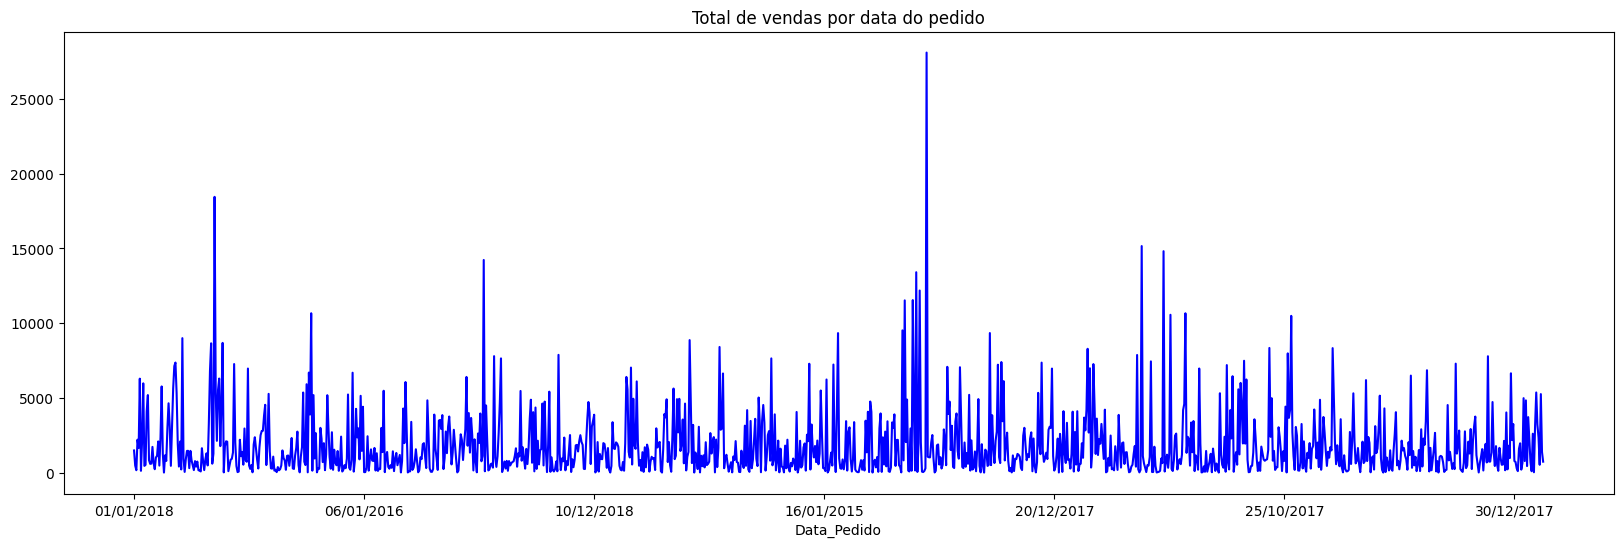

In [16]:
# Plot
plt.figure(figsize = (20, 6))
df_pergunta2.plot(x = 'Data_Pedido', y = 'Valor_Venda', color = 'blue')
plt.title("Total de vendas por data do pedido")
plt.show()

## Pergunta de Negócio 3:
    Qual o Total de Vendas por Estado? Demonstre o resultado através de um gráfico de barras.

In [17]:
# Filtro
df_pergunta3 = dados.groupby('Estado')['Valor_Venda'].sum().reset_index() # "reset_index" Criar uma fatia reordenada do dataframe, sem ele o gráfico não plota

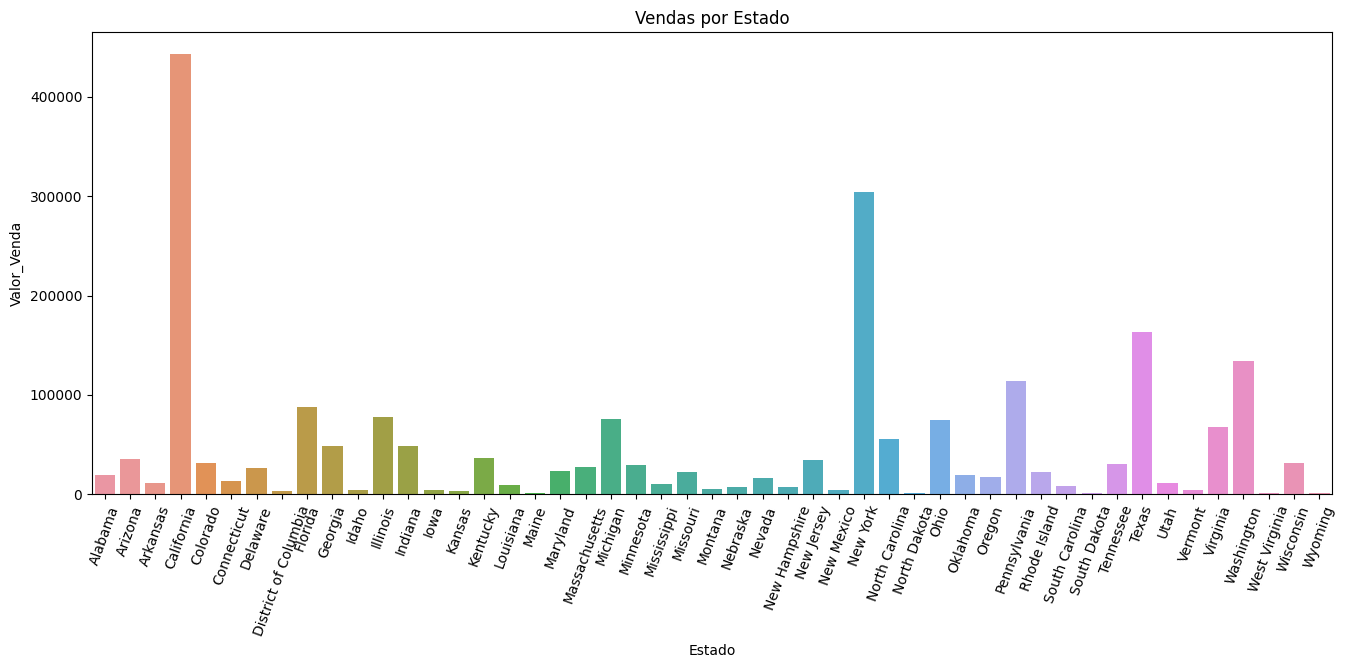

In [18]:
# Plot
plt.figure(figsize = (16, 6))
sns.barplot(data = df_pergunta3, x = 'Estado', y = 'Valor_Venda').set(title = 'Vendas por Estado')
plt.xticks(rotation = 70)
plt.show()

## Pergunta de Negócio 4:
    Quais São as 10 Cidades com Maior Total de Vendas? Demonstre o resultado através de um gráfico de barras.

In [19]:
# Filtro
df_pergunta4 = dados.groupby('Cidade')['Valor_Venda'].sum().reset_index()

In [20]:
# Seleção
pergunta4 = df_pergunta4.sort_values(by = 'Valor_Venda', ascending = False)[:10] # O Sort pode ser colocado após o reset_index()

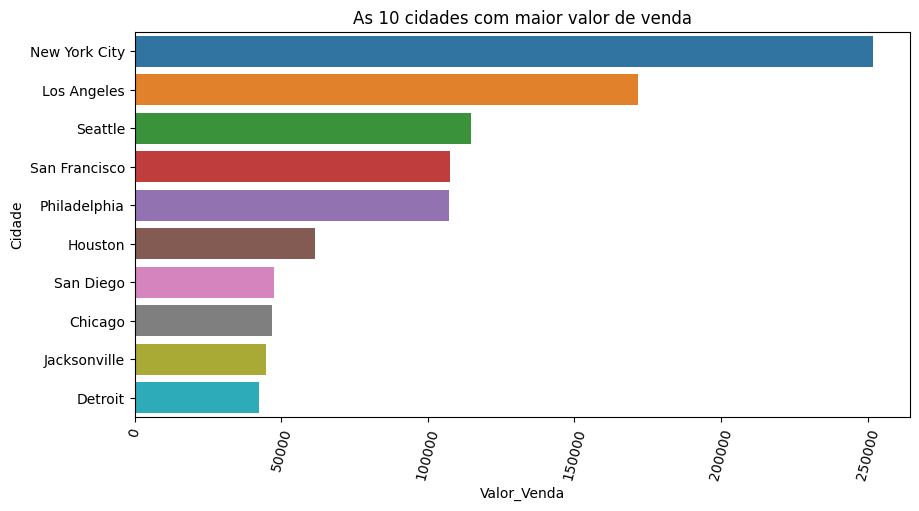

In [21]:
# Plot
plt.figure(figsize = (10, 5))
sns.barplot(data = pergunta4, y = 'Cidade', x = 'Valor_Venda').set(title = 'As 10 cidades com maior valor de venda')
plt.xticks(rotation = 75)
plt.show()

## Pergunta de Negócio 5:
    Qual Segmento Teve o Maior Total de Vendas? Demonstre o resultado através de um gráfico de pizza.

In [22]:
# Função
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100))
        return ' $ {v:d} '.format(v = val)
    return my_format 

In [23]:
# Filtro
df_pergunta5 = dados.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending = False)

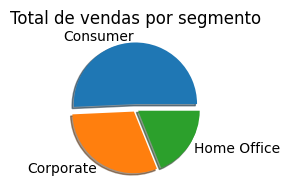

In [24]:
# Plot - Simples
plt.figure(figsize = (5, 2))
plt.pie(df_pergunta5['Valor_Venda'], labels = df_pergunta5['Segmento'], shadow = True, explode = (0.08, 0.05, 0.05))
plt.title('Total de vendas por segmento')
plt.show()

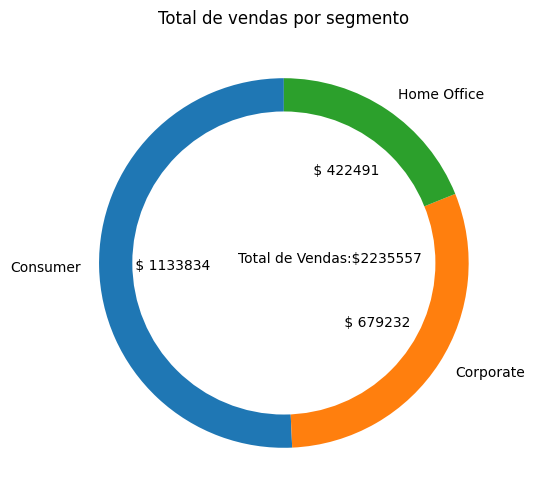

In [25]:
# Plot Turbinado
## Tamanho da Figura
plt.figure(figsize = (16,6))

## Gráfico de Pizza
plt.pie(df_pergunta5['Valor_Venda'], labels = df_pergunta5['Segmento'], autopct = autopct_format(df_pergunta5['Valor_Venda']), startangle = 90)

## Limpa o Círculo central
centre_cicle = plt.Circle((0,0), 0.82, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_cicle)

## Labels e Anotações
plt.annotate(text = 'Total de Vendas:' + '$' + str(int(sum(df_pergunta5['Valor_Venda']))), xy = (-0.25, 0))
plt.title("Total de vendas por segmento")
plt.show()

## Pergunta de Negócio 6 (Desafio Nível Baby):
    Qual o Total de Vendas Por Segmento e Por Ano?

In [26]:
# Meu modo
## Splitei para criar coluna ano
anos = dados['Data_Pedido'].str.split("/")
## Criando a coluna ano com List Comprehension
dados['Ano'] = [ano[2] for ano in anos]
## Dataframe resposta
df_pergunta6 = dados.groupby(['Segmento', 'Ano'])['Valor_Venda'].sum().reset_index()
df_pergunta6

,Segmento,Ano,Valor_Venda
0,Consumer,2015,256719.9166
1,Consumer,2016,265295.2593
2,Consumer,2017,288459.5572
3,Consumer,2018,323359.6019
4,Corporate,2015,125819.5957
5,Corporate,2016,114643.1229
6,Corporate,2017,203266.7398
7,Corporate,2018,235502.7284
8,Home Office,2015,88229.0878
9,Home Office,2016,74134.1332


In [27]:
# Método Professor
dados['Data_Pedido'] = pd.to_datetime(dados['Data_Pedido'], dayfirst = True) # Transformando o formado do dado para datetime

In [28]:
# Conferir alteração da tipagem
dados.dtypes

ID_Pedido               object
Data_Pedido     datetime64[ns]
ID_Cliente              object
Segmento                object
Pais                    object
Cidade                  object
Estado                  object
ID_Produto              object
Categoria               object
SubCategoria            object
Valor_Venda            float64
Ano                     object
dtype: object

In [29]:
# Criando a coluna ano
dados['Ano'] = dados['Data_Pedido'].dt.year

# Filtro
df_pergunta6 = dados.groupby(['Segmento', 'Ano'])['Valor_Venda'].sum().reset_index()

# Resposta
df_pergunta6

,Segmento,Ano,Valor_Venda
0,Consumer,2015,256719.9166
1,Consumer,2016,265295.2593
2,Consumer,2017,288459.5572
3,Consumer,2018,323359.6019
4,Corporate,2015,125819.5957
5,Corporate,2016,114643.1229
6,Corporate,2017,203266.7398
7,Corporate,2018,235502.7284
8,Home Office,2015,88229.0878
9,Home Office,2016,74134.1332


## Pergunta de Negócio 7 (Desafio Nível Júnior):
    Os  gestores  da  empresa  estão  considerando conceder  diferentes  faixas  de  descontos  e gostariam de fazer uma simulação com base na regra abaixo:

    Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
    Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

Quantas Vendas Receberiam 15% de Desconto?

In [30]:
# Criação da coluna desconto
dados['Desconto'] = np.where(dados['Valor_Venda'] > 1000, 0.15, 0.10)

# Contagem dos descontos
df_pergunta7 = dados['Desconto'].value_counts()

# Visualização 
df_pergunta7

0.10    9243
0.15     457
Name: Desconto, dtype: int64

In [31]:
print(f'No total {list(df_pergunta7)[1]} receberam 15% de desconto.')

No total 457 receberam 15% de desconto.


## Pergunta de Negócio 8 (Desafio Nível Master):
    Considere  Que  a  Empresa  Decida  Conceder  o  Desconto  de  15%  do  Item  Anterior.  Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [32]:
# Crianco coluna de valor com desconto
dados['Valor_CDesconto'] = np.where(dados['Valor_Venda'] > 1000, dados['Valor_Venda'] - (dados['Valor_Venda'] * dados['Desconto']), dados['Valor_Venda'] - (dados['Valor_Venda'] * dados['Desconto']))

In [33]:
#Se pedisse dos dois elementos 
##df_pergunta7 = dados.groupby('Desconto')[['Valor_Venda','Valor_CDesconto']].mean().reset_index()

# Seleção/filtro
pergunta7_a = dados.loc[dados['Desconto'] == 0.15, "Valor_Venda"].mean()
pergunta7_d = dados.loc[dados['Desconto'] == 0.15, "Valor_CDesconto"].mean()

In [34]:
print(f'A média das vendas anted do desconto é ${round(pergunta7_a, 2)} e depois do desconto é ${round(pergunta7_d, 2)}.')

A média das vendas anted do desconto é $2116.81 e depois do desconto é $1799.29.


## Pergunta de Negócio 9 (Desafio Nível Master Ninja):
    Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?Demonstre o resultado através de gráfico de linha.

In [35]:
# Criando a coluna mês
dados['Mes'] = dados['Data_Pedido'].dt.month

# Filtrando e Agrupando.
df_pergunta9 = dados.groupby(["Ano", "Mes", "Segmento"])['Valor_Venda'].agg([np.sum, np.mean, np.median]) # Soma, média e mediana

In [36]:
# Extração dos níveis
anos = df_pergunta9.index.get_level_values(0)
meses = df_pergunta9.index.get_level_values(1)
segmentos = df_pergunta9.index.get_level_values(2)

<Figure size 1500x800 with 0 Axes>

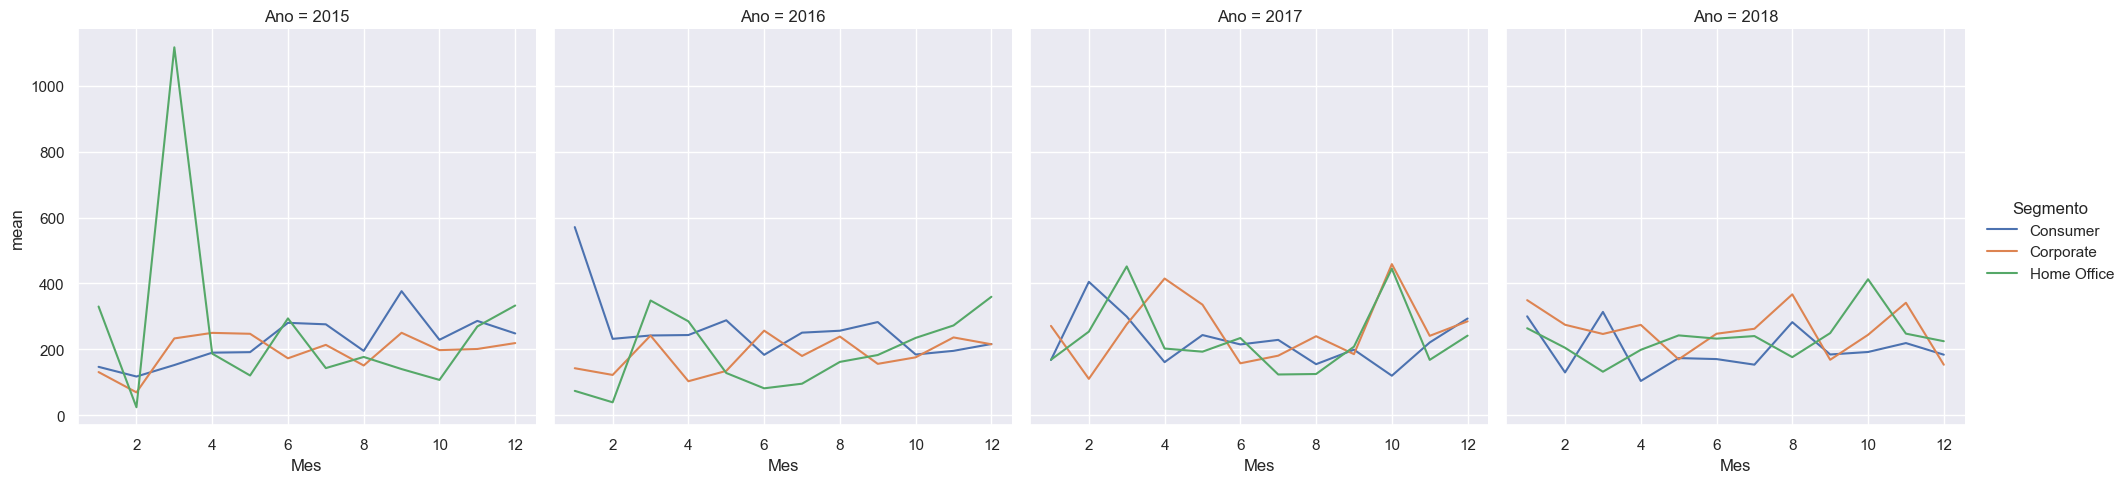

In [37]:
# Plot
plt.figure(figsize = (15, 8))
sns.set() # Como já foi utilizado paleta sns no notebook, esse comando reseta.
fig = sns.relplot(kind = 'line', # Gráfico de linha
                  data = df_pergunta9,
                  y = 'mean',
                  x = meses,
                  hue = segmentos,
                  col = anos,
                  col_wrap = 4
                  )

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):
    Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias?Demonstre tudo através de um único gráfico.

In [38]:
# Visualização dos dados
dados.head(3)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_CDesconto,Mes
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.96,2017,0.1,235.764,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.94,2017,0.1,658.746,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.62,2017,0.1,13.158,6


In [39]:
df_pergunta10 = dados.groupby(['Categoria', 'SubCategoria']).sum(numeric_only = True).sort_values('Valor_Venda', ascending = False).head(12)

In [40]:
df_pergunta10 = df_pergunta10[['Valor_Venda']].astype(int).sort_values(by = 'Categoria').reset_index()

In [41]:
df_pergunta10_cat = df_pergunta10.groupby('Categoria').sum(numeric_only = True).reset_index()

In [42]:
cores_categorias = ['#5d00de',
                    '#0ee84f',
                    '#e80e27']

cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

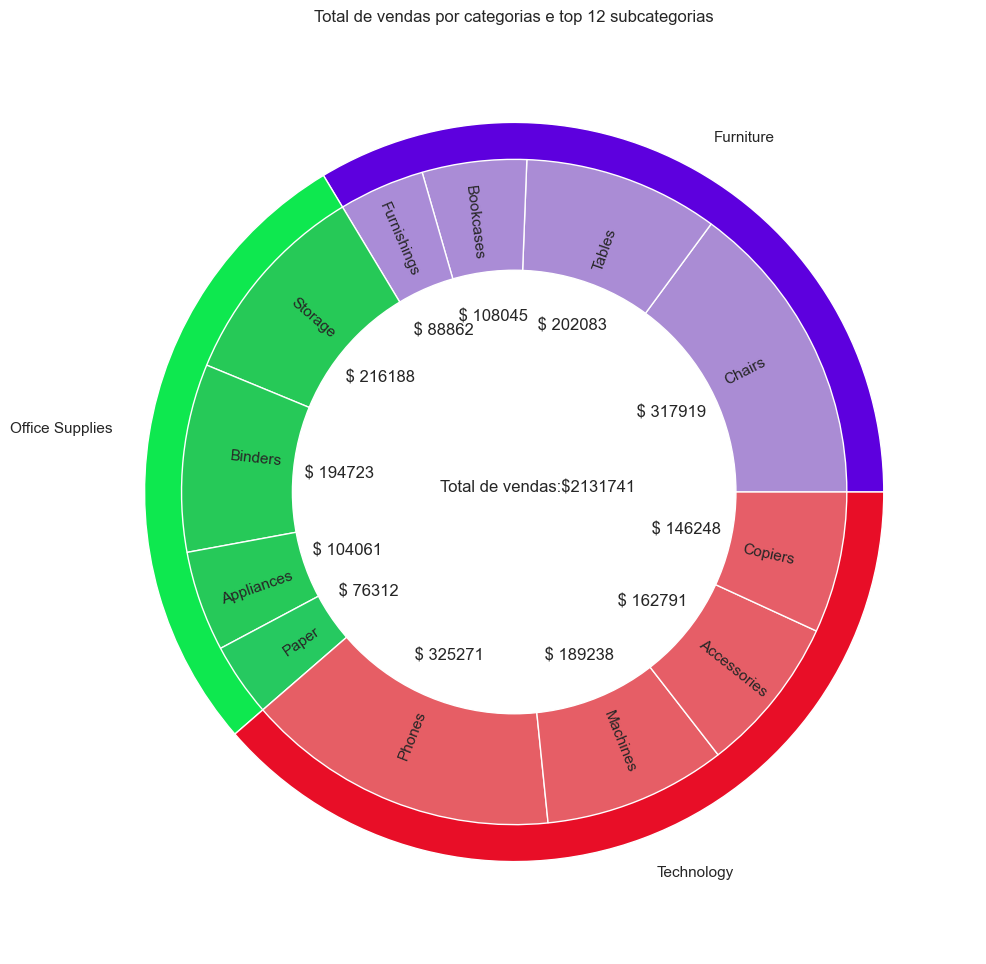

In [43]:
# Plot

# Tamanho da figura
fig, ax = plt.subplots(figsize = (18, 12))

# Gráfico categorias
p1 = ax.pie(df_pergunta10_cat['Valor_Venda'],
            radius = 1,
            labels = df_pergunta10_cat['Categoria'],
            wedgeprops = dict(edgecolor = 'white'), 
            colors = cores_categorias)

# Gráfico subcategorias
p2 = ax.pie(df_pergunta10['Valor_Venda'],
            radius = 0.9,
            labels = df_pergunta10['SubCategoria'],
            autopct = autopct_format(df_pergunta10['Valor_Venda']),
            colors = cores_subcategorias,
            labeldistance = 0.7,
            wedgeprops = dict(edgecolor = 'white'),
            pctdistance = 0.53,
            rotatelabels = True)

# Limpa o centro do círculo
centre_cicle = plt.Circle((0, 0), 0.6, fc = 'white')

# Labels e anotações
fig = plt.gcf()
fig.gca().add_artist(centre_cicle)
plt.annotate(text = 'Total de vendas:' + '$' + str(int(sum(df_pergunta10['Valor_Venda']))), xy = (-0.2, 0))
plt.title("Total de vendas por categorias e top 12 subcategorias")
plt.show()